## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  My goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.



<a id='descriptive'></a>
#### Part I - Descriptive Statistics

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(0)

For each of the parts of question `1` notice links to [pandas documentation](https://pandas.pydata.org/) is provided to assist with answering the questions.  Though there are other ways you could solve the questions, the documentation is provided to assist you with one fast way to find the answer to each question.


`1.a)` Now, read in the `ab_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. **This question is completed for you**:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset. [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)

In [4]:
df.shape

(69889, 3)

`c)` The proportion of users converted.  [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)

In [5]:
total_converted = df['converted'].sum()
proportion_converted = total_converted / df.shape[0]
print(f"The proportion of users converted is: {proportion_converted:.4}")

The proportion of users converted is: 0.1305


`d)` Do any of the rows have missing values? [Helpful Pandas Link One](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [Helpful Pandas Link Two](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [6]:
df.isnull().sum()
print('There are no null values in the dataset.')

There are no null values in the dataset.


`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

In [7]:
df['country'].value_counts()

US    48850
UK    17551
CA     3488
Name: country, dtype: int64

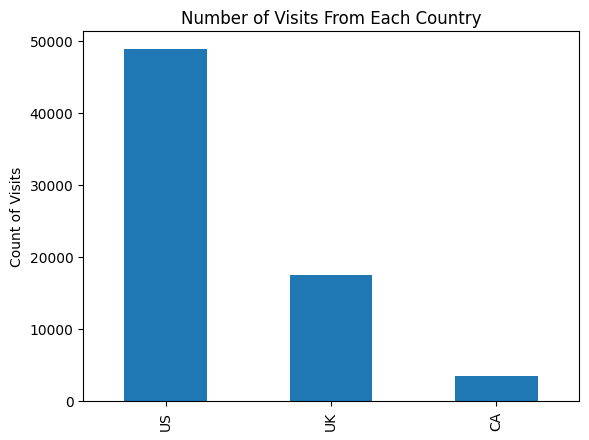

In [8]:
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

`f)` Recognize that all of your columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**? [Helpful Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

In [9]:
print(df.dtypes)
print("The 'converted' column is numerical, and is not catigorical")

country      object
group        object
converted     int64
dtype: object
The 'converted' column is numerical, and is not catigorical


`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 

**Here you can use one of the functions you used in an earlier question**.

In [10]:
df['converted'].value_counts()

print("Yes, it makes sense that there are only two values in the 'converted' column")
print("0 = No and 1 = Yes")

Yes, it makes sense that there are only two values in the 'converted' column
0 = No and 1 = Yes


<a id='probability'></a>
#### Part II - Probability

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [11]:
conversion_probability = df['converted'].mean()

print(f"Probability of conversion: {conversion_probability}")

Probability of conversion: 0.13047832992316388


`b)` Given that an individual was in the `control` group, what is the probability they converted? **This question is completed for you**

In [12]:
df.query('group == "control"')['converted'].mean()

0.1052540515600669

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [38]:
df.query('group == "treatment"')['converted'].mean()

#df.groupby('group')['converted'].mean()

group
control      0.105254
treatment    0.155321
Name: converted, dtype: float64

In [43]:
# Number of visitors in the Treatment (Variant) group
df.query('group == "treatment"').shape[0]


35211

In [42]:
# Number of visitors in the Control group
df.query('group == "control"').shape[0]

34678

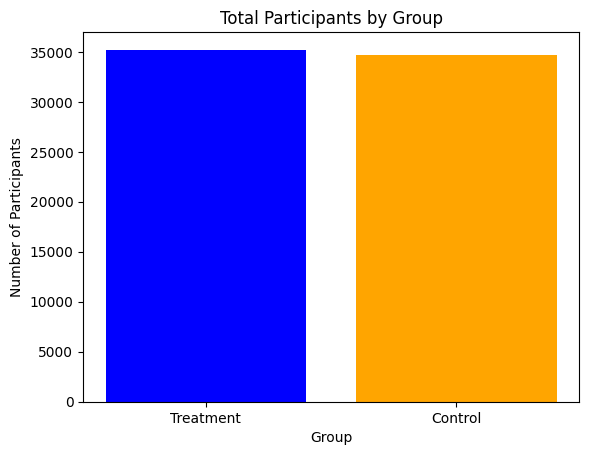

In [46]:
total_treatment = df.query('group == "treatment"').shape[0]
total_control = df.query('group == "control"').shape[0]

groups = ['Treatment', 'Control']
totals = [total_treatment, total_control]

plt.bar(groups, totals, color=['blue', 'orange'])
plt.title('Total Participants by Group')
plt.ylabel('Number of Participants')
plt.xlabel('Group')
plt.show()

`d)` Do you see evidence that the treatment is related to higher `converted` rates?

In [14]:
print('There is evidence that the treatment group has a higher conversion rate compared to the control group.')

There is evidence that the treatment group has a higher conversion rate compared to the control group.


`e)` What is the probability that an individual was in the `treatment`?

In [15]:
probability_treatment = (df['group'] == 'treatment').mean()

print(f"The probability that an individual was in the treatment group is {probability_treatment}")

The probability that an individual was in the treatment group is 0.5038131894861853


`f)` What is the probability that an individual was from Canada `CA`?

In [16]:
probability_canada = (df['country'] == 'CA').mean()

print(f"Probability of being from Canada: {probability_canada}")

Probability of being from Canada: 0.04990771079855199


Given that an individual was in the `US`, what was the probability that they `converted`? **This question is completed for you**

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [17]:
df.query('country == "US"')['converted'].mean()

0.13277379733879222

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [18]:
uk_conversion_probability = df.query('country == "UK"')['converted'].mean()

print(f"Probability of conversion in the UK: {uk_conversion_probability:}")

Probability of conversion in the UK: 0.12512107572218106


`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

In [19]:
conversion_rates_by_country = df.groupby('country')['converted'].mean()

print(conversion_rates_by_country)

country
CA    0.125287
UK    0.125121
US    0.132774
Name: converted, dtype: float64


`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.  The `US` column is done for you, and two methods for calculating the probabilities are shown - **COMPLETE THE REST OF THE TABLE**.  Does it appear that there could be an interaction between how country and treatment impact conversion?

These two values that are filled in can be written as:

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [20]:
uk_control_conversion = df.query('country == "UK" and group == "control"')['converted'].mean() * 100
uk_treatment_conversion = df.query('country == "UK" and group == "treatment"')['converted'].mean() * 100


uk_control_conversion, uk_treatment_conversion

(10.164866401364412, 14.8698035632709)

In [21]:
ca_control_conversion = df.query('country == "CA" and group == "control"')['converted'].mean() * 100
ca_treatment_conversion = df.query('country == "CA" and group == "treatment"')['converted'].mean() * 100

ca_control_conversion, ca_treatment_conversion

(9.44741532976827, 15.401662049861494)

##### Solution -- Complete the Table Here

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  10.2%      |  9.4%       |
| Treatment   | 15.8%       |  14.9%      |  15.4%      |

<a id='experimentation'></a>
### Part III - Experimentation

`1.` Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Use a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  

If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 4** in the classroom to make sure you are on the right track.<br><br>

`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. **All of these values are set below, and set the stage for the simulations you will run for the rest of this section.**

In [22]:
p_control_treatment_null  = df['converted'].mean()
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]

`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [23]:
treatment_converted = np.random.binomial(1, p_control_treatment_null, n_treatment)
treatment_converted

array([0, 0, 0, ..., 1, 0, 0])

`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [24]:
control_converted = np.random.binomial(1, p_control_treatment_null, n_control)
control_converted

array([0, 1, 0, ..., 1, 1, 0])

`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [25]:
p_treatment = np.mean(treatment_converted)
p_control = np.mean(control_converted)

# Calculate the difference in conversion rates
p_diff = p_treatment - p_control
p_diff

0.003970883815028192

`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [26]:
# Initialize an empty list to store the differences
p_diffs = []

# Simulate 500 times
for _ in range(500):
    # Simulate treatment conversions under the null
    treatment_converted = np.random.binomial(1, p_control_treatment_null, n_treatment)
    # Simulate control conversions under the null
    control_converted = np.random.binomial(1, p_control_treatment_null, n_control)
    
    # Calculate the proportions for treatment and control groups
    p_treatment = np.mean(treatment_converted)
    p_control = np.mean(control_converted)
    
    # Calculate the difference in proportions an append to the list
    p_diffs.append(p_treatment - p_control)

# Convert the list to a numpy array
p_diffs_array = np.array(p_diffs)

# Display the first 10 simulated differences for verification
print(p_diffs[:10])

[0.0020108594373272892, -0.004243708681045788, 0.003370987197448355, 0.0008495061621122402, 0.0005371308138396036, -0.0010013094843392967, 0.0036986674431674638, 0.000611801154677516, 0.0006542237621115499, 0.0037122533241466804]


`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

<AxesSubplot: >

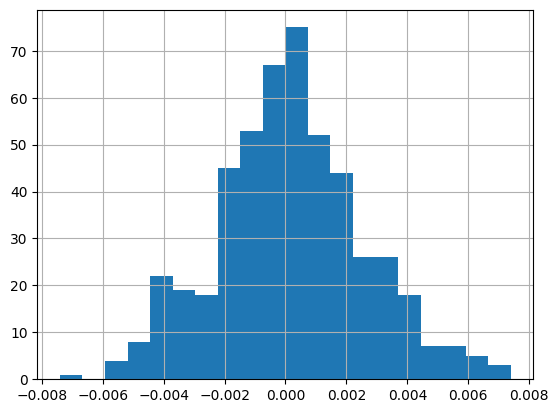

In [27]:
p_diffs = pd.Series(p_diffs)
p_diffs.hist(bins=20)

`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [47]:
# Calculate the observed difference in conversion rates
p_treatment_obs = df.query('group == "treatment"')['converted'].mean()
p_control_obs = df.query('group == "control"')['converted'].mean()
p_obs = p_treatment_obs - p_control_obs

# Calculate the proportion of p_diffs greater than the observed difference
p_value = (p_diffs > p_obs).mean()

# Display results
print(f"Treatment Conversion Rate: {p_treatment_obs:.4f}")
print(f"Control Conversion Rate: {p_control_obs:.4f}")
print(f"Observed Difference (p_obs): {p_obs:.4f}")
print(f"Proportion of p_diffs greater than p_obs (p-value): {p_value:.4f}")


Treatment Conversion Rate: 0.1553
Control Conversion Rate: 0.1053
Observed Difference (p_obs): 0.0501
Proportion of p_diffs greater than p_obs (p-value): 0.0000


`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

In the previous the section we made two calculations, the observed difference, and the p-value.

The observed difference calculation computes the actual difference in conversion rates between users who viewed the new page and those who viewed the old page.

The p-value calculates how frequently the differences simulated under the assumption that there is no real difference between the pages (the null hypothesis) were greater than the observed difference from the actual data.

The p-value tells us whether the observed difference in conversion rates is statistically significant. If this p-value is less than 0.05 (our Type I error rate), it suggests there's enough evidence to reject the null hypothesis, meaning the new page likely has a significant impact on conversions. If the p-value is more than 0.05, it suggests there is not enough evidence to reject the null hypothesis, meaning the new page does not significantly impact conversions compared to the old page.

<a id='algorithms'></a>
### Part IV - Algorithms

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.  All the code needed for the modeling and results of the modeling for sections `b) - f)` have been completed for you. 

**You will need to complete sections `a)` and `g)`.**  

**Then use the code from `1.` to assist with the question `2.`   You should be able to modify the code to assist in answering each of question 2's parts.**<br><br>

`a)` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

The regression model that is appropriate for this situation is logistic regression. logistic regression is soecifically designed for binary outcomes, like whether a user converted(1) or not converted(0).

The goal is to use **statsmodels** to fit the regression model you specified in part `a)` to see if there is a significant difference in conversion based on which page a customer receives.  

`b)` However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

It may be helpful to look at the [get_dummies documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to encode the `ab_page` column.

Below you can see an example of the new columns that will need to be added (The order of columns is not important.): **This question is completed for you**

##### Example DataFrame
| intercept   | group       | ab_page     | converted   |
| ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  1          |

In [29]:
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head()

,country,group,converted,intercept,ab_page
0,UK,control,0,1,0
1,US,treatment,1,1,1
2,UK,treatment,0,1,1
3,UK,control,0,1,0
4,UK,treatment,0,1,1


`c)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is a difference in `treatment` vs. `control`. **This question is completed for you**

In [30]:
X = df[['intercept', 'ab_page']]
y = df['converted']

`d)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `c)`. 

You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).  **This question is completed for you**

In [31]:
import statsmodels.api as sm

# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


`e)` Provide the summary of your model below. **This question is completed for you**

In [32]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Fri, 17 Jan 2025   Pseudo R-squ.:                0.007175
Time:                        22:11:49   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1402      0.017   -122.305      0.000      -2.174      -2.106
ab_page        0.4467      0.023     19.539      0.000       0.402       0.492


`f)` What is the p-value associated with **ab_page**? Does it lead you to the same conclusion you drew in the **Experiment** section.

The Logit Regression Summary shows a p-value of 0.000 for ab_page, this does in fact support the conclusion we drew in the experiment section which also gave a us a p_value of 0.000. We can conclude that the treatment (new page) has a significant impact on conversion rates compared to the control (old page) and we can therefore reject the null hypothesis.

`2. a)` Now you will want to create two new columns as dummy variables for `US` and `UK`.  Again, use `get_dummies` to add these columns.  The dataframe you create should include at least the following columns (If both columns for `US` and `UK` are `0` this represents `CA`.  The order of rows and columns is not important for you to match - it is just to illustrate how columns should connect to one another.):

##### Example DataFrame
| intercept   | group       | ab_page     | converted   | country     |  US         | UK          |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  0          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  1          |  CA         |  0          |  0          |
| 1           |  treatment  |  1          |  1          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  1          |  US         |  1          |  0          |

In [33]:
country_dummies = pd.get_dummies(df['country'])

df['US'] = country_dummies['US']
df['UK'] = country_dummies['UK']

df.head()

,country,group,converted,intercept,ab_page,US,UK
0,UK,control,0,1,0,0,1
1,US,treatment,1,1,1,1,0
2,UK,treatment,0,1,1,0,1
3,UK,control,0,1,0,0,1
4,UK,treatment,0,1,1,0,1


`b)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is 
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [34]:
y = df['converted']
X = df[['intercept', 'ab_page', 'US', 'UK']]

`c)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `b)`. 
You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).

In [35]:
import statsmodels.api as sm

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384463
         Iterations 6


`d)` Provide the summary of your model below.

In [36]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69885
Method:                           MLE   Df Model:                            3
Date:                Fri, 17 Jan 2025   Pseudo R-squ.:                0.007312
Time:                        22:11:56   Log-Likelihood:                -26870.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.778e-85
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1930      0.053    -41.308      0.000      -2.297      -2.089
ab_page        0.4466      0.023     19.534      0.000       0.402       0.491
US             0.0727      0.053      1.372      0.1

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`? 

US P-value = 0.17:

This p-value indicates that there is no statistically significant difference in conversion rates between users from the US and users from Canada. The value of 0.17 exceeds the common significance level of 0.05, which suggests that we fail to reject the null hypothesis for the US. Therefore, the conversions rates for users in the US and Canada are statistically similar.

UK P-value = 0.905:

A p-value of 0.905 is much higher than the conventional threshold of 0.05, indicating a very strong likelihood that any observed difference in conversion rates between the UK and Canada is due to random chance rather than a real effect. Thus, there is no statistically significant difference in conversion rates between these two countries.